In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
# 📌 Load CSV file (replace filename if needed)
df = pd.read_csv('Housing.csv')

# 📌 Quick look
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
# 📌 Basic info
print(df.info())
print(df.describe())

# 📌 Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

In [13]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']

# Label encode them
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Confirm
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [14]:
# 📌 Define features (X) and target (y)
X = df.drop('price', axis=1)  # Features are all columns except 'price'
y = df['price']              # Target is the 'price' column

# 📌 Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split successfully!")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Data split successfully!
Training features shape: (436, 12)
Testing features shape: (109, 12)
Training target shape: (436,)
Testing target shape: (109,)


In [15]:
# Features and target
X = df.drop('price', axis=1)
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [17]:
# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R² Score: {r2:.2f}')


MAE: 979679.69
MSE: 1771751116594.04
R² Score: 0.65


In [18]:
# Intercept & coefficients
print("Intercept:", model.intercept_)
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coeff_df)


Intercept: 293083.06915066857
             Feature   Coefficient
0               area  2.358488e+02
1           bedrooms  7.857449e+04
2          bathrooms  1.097117e+06
3            stories  4.062232e+05
4           mainroad  3.668242e+05
5          guestroom  2.331468e+05
6           basement  3.931598e+05
7    hotwaterheating  6.878813e+05
8    airconditioning  7.855506e+05
9            parking  2.257565e+05
10          prefarea  6.299017e+05
11  furnishingstatus -2.103971e+05


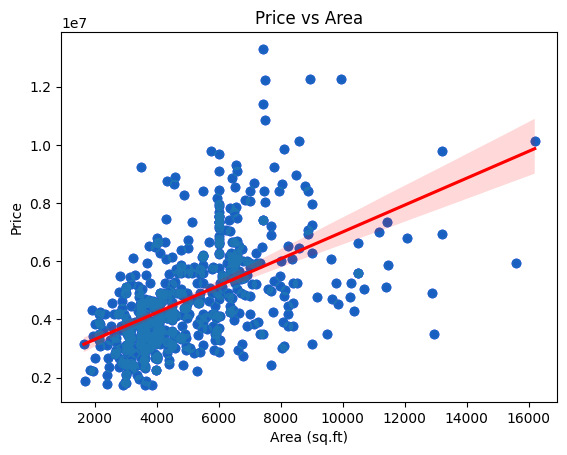

In [19]:
# Simple regression: Area vs Price
plt.scatter(df['area'], df['price'], color='blue')
sns.regplot(x='area', y='price', data=df, line_kws={"color":"red"})
plt.title('Price vs Area')
plt.xlabel('Area (sq.ft)')
plt.ylabel('Price')
plt.show()
